# Unsupervised Machine learning using arcgis.learn guide

## Table of Contents <a class="anchor" id="0"></a>
* [Introduction](#1) 
* [Prepare tabular data](#2)  
* [Data Visualization](#4a)
* [Load Unsupervised model architecture](#5)
    * [Finding Number of Clusters](#5a) 
* [Unsupervised ML Model Training](#8a)
* [Model Validation metrics](#11)
* [Model Saving & Loading](#11a)
* [Model Inferencing ](#12) 
* [Summary](#13)
* [References](#14)

## Introduction <a class="anchor" id="1"></a>

In the unsupervised section of the [MLModel](https://developers.arcgis.com/python/api-reference/arcgis.learn.html#mlmodel) implementation available in `arcgis.learn`, selected [scikit-learn unsupervised](https://scikit-learn.org/stable/unsupervised_learning.html) model could be fitted using this framework. The unsupervised modules that can be used from scikit-learn includes [Gaussian mixture models](https://scikit-learn.org/stable/modules/mixture.html), [Clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) and [Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html). Unsupervised learning as the name suggest does not require labelled data and is also regarded by many as the true form of AI. Thus, compared to supervised machine learning, unsupervised learning discovers existing patterns in the input data by itself.

Data can be [feature layer](https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/), [spatially enabled dataframe](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) with/without rasters or just a simple dataframe. Usually in case of unsupervised learning there is no dependent variable and the explanatory variables can take the form of fields in the attribute table of the training features, raster datasets, and distance features used to calculate proximity values for use as additional variables. In addition to validation of model performance based on the training data, predictions can be made to produce either features or a prediction raster.  Training and predictions can be performed for both categorical variables and continuous variables.

The overall implementation methodology of the unsupervised machine learning is identical to that of supervised machine learning, but only with additional respective functionalities for the various modules and their submodules, which are discussed in the following available unsupervised scikit-learn models.   
1.	Gaussian mixture models
        * [Gaussian mixture models](https://scikit-learn.org/stable/modules/mixture.html)
2.	Clustering
        * [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) 
3.	Novelty and Outlier Detection
         * [Novelty Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-detection)
         * [Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#id1)
         * [Novelty detection with Local Outlier Factor](https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-detection-with-local-outlier-factor)



### Prepare tabular data <a class="anchor" id="2"></a>

The first step is to create a TabularDataObject using the `prepare_tabulardata` method that can be fed into the various unsupervised `MLModel` models. This data preparation is carried out using the attribute data from feature layers, spatial data frames. Additionally, variables in the form of rasters can be used. The raster dataset can be imagery layer which can be accessed through ArcGIS portal or locally saved rasters which can be accessed using the raster class from ArcGIS API for Python. This method performs normalization of the datasets, imputation, and splits it into training and validation datasets before feeding the datasets into the model.

The `prepare_tabulardata` method inspects the type of fields in the input data and automatically treats them as continuous variables. However, for categorical variables a `True` value has to be passed inside a tuple along with the specific variable.

As part of the input data, the explanatory variables containing categorical and continuous variables are defined as follows:

`X = ["Field_1", ("Field_2", True),......."Field_n"]`

Here **Field_2** is treated as categorical and the others as continuous variables.

In cases where variables are stored as multiple rasters, then:

`explanatory_rasters = [RasterClassObject1,(RasterClassObject2, True),.......RasterClassObjectn]` 


Here, RasterClassObject2 is treated as categorical and the others as continuous variables.

`preprocessors`: Finally data transformation information is stored in the `preprocessors` parameter.  With this the user can select any scaler function from scikit-learn to transform the fields using the selected scaler as follows:

In [ ]:
preprocessors = [('column1','column2',scaler1),('column1', Scalar2),.....]

and as well scale the full dataset instead of individual columns using a single scaler:

In [ ]:
preprocessors =  [("Field_1", ("Field_2", True),......."Field_n", MinMaxScaler())]

The follows scale the whole dataset:

In [ ]:
preprocessors = [(*df.columns,scaler)]

If the dataset is a raster the preprocessors can be defined as follows:

In [ ]:
preprocessors = [('raster.tif',MinMaxScaler())]  # also the following

In [ ]:
preprocessors = [(raster.name, MinMaxScaler())] # here raster is the Raster object

Here these variables are transformed by the MinMaxScaler function by passing it, along with the variable list as the last item. The user can choose any scaler function for the same. If nothing is passed, then the default is Normalizer from scikit learn. The MinMaxScaler is imported from scikit-learn as the scaling function. The scikit-learn module is packaged into the ArcGis learn module, and no separate installation of scikit-learn is not required.

Once the explanatory variables or the explanatory rasters list is ready, these can now be used as input for the prepare_tabulardata() method. The method takes the feature layer or a spatial dataframe containing the dataset along with the `explanatory_variables` and `preprocessors` and prepares it for fitting the selected unsupervised model form scikit-learn as follows:

In [ ]:
data = prepare_tabulardata(input_feature,                             
                            explanatory_variables=X,
                            explanatory_rasters=[explanatory_rasters],
                            preprocessors=preprocessors)

In case the input dataset are only rasters, then `explanatory_variables=X` is ignored in the above 

Here: 

`input_features`: It takes in data in the form of feature layer, spatially enabled data frames, or simple dataframe. Feature layers can be of point or polygon geometry.

`date_field`: Field name from the input_features layer. If specified, the field will be split into year, month, week, day, dayofweek, dayofyear, is_month_end, is_month_start, is_quarter_end, is_quarter_start, is_year_end, is_year_start, hour, minute, second, elapsed. If specified here, there is no need to specify as part of explanatory_variables in the following.

`explanatory_variables` : List of the field names containing the explanatory variables from the input_layer, where 2-sized tuples has to be passed for categorical variables as discussed above.

`explanatory_rasters` : List of the Raster objects, where 2-sized tuples has to be passed for categorical variables as discussed above.

`distance_features`: Distance features are used to automatically create explanatory variables by calculating a distance from the provided features to the input_features. Distances will be calculated from each of the input explanatory distance features to the nearest Input training features. If the input distance_features are polygons or lines, the distance attributes are calculated as the distance between the closest segments of the pair of features. However, distances are calculated differently for polygons and lines. See how proximity tools calculate distance for details.

`preprocessors`: Data transformation is accomplished by the `preprocessors` parameter.

### Data Visualization<a class="anchor" id="4a"></a> 

Data visualization can provide useful information for modeling, for example it  can show missing data, data trends, existing correlation among predictors and with the dependent variable, variable significance and redundancy etc., which will help determine the  significant parameter for modeling initialization.

This visualization is done by `data.show_batch(rows=n)` which will print out n random rows of the original data. The entire data can be printed using `data._dataframe` 

### Load Unsupervised model architecture<a class="anchor" id="5"></a>  

The TabularDataObject prepared by the `prepare_tabulardata` method is now ready to be passed to the `MLModel` method for model initialization. A selected unsupervised machine learning model from scikit-learn is used for loading the model for training. Here, for demonstration purpose, model initialization with some sample unsupervised model from scikit-learn is shown, which is passed into the `MLModel` function, along with its parameters.

First, the `MLModel` is imported from `arcgis.learn`. Then, the model to be used from scikit-learn is specified with the respective model parameters defined as keyword arguements:

In [ ]:
from arcgis.learn import MLModel

##### <span style='color:Gray'>**— Initialization of a sample [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)**</span> 

In [ ]:
# defining the unsupervised mlmodel with a Gaussian mixture model along with the parameters  
model = MLModel(data, 'sklearn.mixture.GaussianMixture',
                n_components=3,
                covariance_type='spherical', 
                n_init=10,
                tol=1e-3,
                max_iter=1000,
                random_state=42)

##### <span style='color:Gray'>**— Initialization of a sample [K-means clustering Model](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**</span>

In [ ]:
# defining the unsupervised mlmodel with a kmeans clustering model along with the parameters 
model = MLModel(data, 'sklearn.cluster.KMeans',
                n_clusters=3,
                init='k-means++',
                random_state=43)

#### Finding Number of Clusters<a class="anchor" id="5a"></a>  

In the above model initialization if the number of components(n_components) for the Gaussian Mixture Model, and number of clusters(n_clusters) for the K-means clustering Model are not passed it automatically finds the optimum number of clusters for the respective unsupervised scikit-learn models using the [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), and bic score respectively.

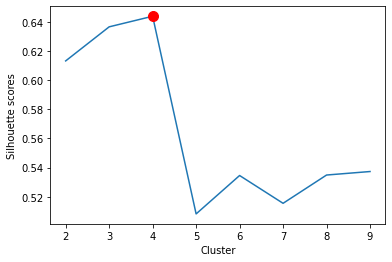

##### <span style='color:Gray'>**— Initialization of a sample Anomaly detection [IsolationForest Model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)**</span>

In [ ]:
# defining the mlmodel with unsupervised anomaly detection Isolation forest model along with the parameters
outliers_fraction = .04
model = MLModel(data, 'sklearn.ensemble.IsolationForest',
                n_estimators=10,
                contamination=outliers_fraction,
                random_state=42)

##### <span style='color:Gray'>**— Initialization of a sample Outlier detection [Elliptic Envelope Model](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope)**</span>

In [ ]:
# defining the mlmodel with a unsupervised Outlier Detection Elliptic Envelope model along with the parameters
outliers_fraction = .04
model = MLModel(data, 'sklearn.covariance.EllipticEnvelope',
                contamination=outliers_fraction,
                random_state=42)

##### <span style='color:Gray'>**— Initialization of a sample Unsupervised Novelty detection using [Local Outlier Factor (LOF) model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)**</span>

In [ ]:
# defining the mlmodel with a unsupervised novelty detection Local Outlier Factor model along with the parameters
# for using LOF as a outllier detection model the estimator can be instantiated with the novelty parameter set to False
outliers_fraction = .04
model = MLModel(data, 'sklearn.neighbors.LocalOutlierFactor',
                n_neighbors=20,
                novelty=True,
                contamination=outliers_fraction)

##### <span style='color:Gray'>**— Initialization of a sample Unsupervised Outlier and Novelty detection using [One-Class SVM model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)**</span>

In [ ]:
# defining the mlmodel with a unsupervised novelty detection Local Outlier Factor model along with the parameters
outliers_fraction = .04
model = MLModel(data, 'sklearn.svm.OneClassSVM',
                nu=outliers_fraction,
                kernel="rbf", gamma=0.1) 

### Unsupervised ML Model Training<a class="anchor" id="8a"></a>
Once the machine learning model is initialized with the data, the unsupervised scikit-learn model and its parameters mentioned in the previous step, the `model.fit()` method is used for fitting the machine learning model. 

In [ ]:
model.fit()

After the model is trained, sample results of the the training are printed using `model.show_results(rows=n)`. The model.show_results() will typically output a table where the last column will contain the values or the labels predicted by the model on the trained dataset. 

### Model Validation metrics<a class="anchor" id="11"></a> 

Unlike supervised MLModel there is no universal model scoring method for determining model performances for unsupervised MLModels, since there are no labels to measure the success of trained model. Thus, unsupervised modeling is extremely flexible, which finds existing patterns in the data which are unknown to the user, rather than predefined labels to guide the optimization process.      

However, the results returned by the trained unsupervised models has respective indexes to understand the quality of results. Some of these functions for the respective unsupervised scikti-learn model available via the MLModel implementation are as follows:   

<span style='color:Gray'>**[Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)**</span> 

`predict_probability(X)` method predict posterior probability of each component given the data, thereby give probability of each sample for belonging to a certain cluster for Gaussian mixture modeling.

<span style='color:Gray'>**[K-means clustering Model](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**</span>

`score(X, y=None, sample_weight=None)` function returns the opposite of inertia of the fit model, hence the greater the value better is the clustering or lowest inertia returns the best clusters.

<span style='color:Gray'>**[IsolationForest Model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)**</span>

`decision_function(X)` returns average anomaly score of X of the base classifiers. The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest. This function other than identifying anomaly could also be used understanding  explainability  of predictors causing the anomaly, and as well selecting anomlay based on upper and lower bound quantile.


<span style='color:Gray'>**[One-Class SVM model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)**</span>

`decision_function(X)` Signed distance to the separating hyperplane. Signed distance is positive for an inlier and negative for an outlier.

<span style='color:Gray'>**[Local Outlier Factor (LOF) model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)**</span>


`kneighbors(X=None, n_neighbors=None, return_distance=True)` function finds the K-neighbors of a point, and returns indices of and distances to the neighbors of each point. Using the estimated distance for each sample point it decides the anomaly samples. This is a density-based outliers detection method, based on the its distance from surrounding neighbours, compared to other points & distance of their neighbors.

<span style='color:Gray'>**[Elliptic Envelope Model](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope)**</span>

`mahalanobis(X)` function computes the squared Mahalanobis distances of given observations.

### Model Saving & Loading<a class="anchor" id="11a"></a> 

The trained model can now be saved using the model.save(name_or_path) command, which will save the model weights and create an Esri Model Definition and Deep Learning Package or DLPK zip. For example:

In [ ]:
model.save(r'/path/', publish=True)

The `publish` parameter is an optional boolean which publishes the DLPK as an item in Arcgis portal.

The saved model can be loaded back using `model.from_model(emd_path, data=None)`, which will load the trained model from the provided `emd_path` and would be ready for inferencing. The `data` parameter is optional and requires a fastai Databunch returned  by the `prepare_tabulardata` function, and is only for further training the model on a new dataset.

### Model Inferencing <a class="anchor" id="12"></a> 

`Predicting to features`

With a model that has been trained using any combination of `Explanatory Variables`, `distance Features`, and `Explanatory Training Rasters`, it can be used to predict clusters, labels or anomaly on the same dataset that it has been trained. Predicting to features option is provided by default in the `prediction_type` , where it publishes the resulting layer with the provided name in the output_layer_name  


In [ ]:
pred = model.predict(feature_data_layer, output_layer_name='prediction_clusters')

`Predicting to dataframe`

The user can predict it to a resulting dataframe by mentioning in the `prediction_type` as `dataframe`, which can be saved locally.

In [ ]:
pred_new = model.predict(feature_data_layer, prediction_type='dataframe')

`Predicting to rasters`
The user can predict it to a raster data type by mentioning the `prediction_type` as raster and providing a path for the  output_raster_path, for saving it locally.

In [ ]:
pred_new = model.predict(explanatory_rasters=[raster1], 
                         prediction_type='raster',
                         output_raster_path=r"\folder_path\result.tif")

### Summary <a class="anchor" id="13"></a>

Here in this guide application of selected unsupervised models via the MLModel framework was elaborated. The scikit-learn models that could be applied using this framework are Gaussian mixture models, Clustering algorithms and Novelty and Outlier Detection also Anomaly detection models from scikit-learn.

An important implementation for the gaussian mixture models and clustering algorithm of automatically finding the optimum number of clusters were shown, which can provide interesting insight to discover data patterns.

Application of these models can be better understood from various sample notebooks for example the one where deforested areas are identified using a gaussian mixture model, which would be made available in this repository for GIS analysts and data scientists, along with other interesting notebooks that are planned using this module from ArcGIS API for Python.

### References <a class="anchor" id="14"></a>

| Topic | Description | Link |
| -| - |-|
| MLModel| MLModel from arcgis.learn module  |https://developers.arcgis.com/python/api-reference/arcgis.learn.html#mlmodel|
| scikit-learn unsupervised models| Unsupervised models implemented from scikit learn  |https://scikit-learn.org/stable/unsupervised_learning.html|
| Gaussian mixture model| Gaussian mixture model from scikit learn  |https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html|| 
| Clustering algorithm| Clustering models from scikit learn  |https://scikit-learn.org/stable/modules/clustering.html|
| K-means Clustering| K-means clustering model   |https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html|
| Silhouette analysis| Silhouette analysis for optimizing clusters  |https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html|
| One-Class SVM model| Novelty and Outlier Detection models|https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html|
| Local Outlier Factor (LOF) model| Novelty detection model|https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor|
| Elliptic Envelope Model| Outlier detection model  |https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope|
| IsolationForest Model| Anomaly detection  |https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html|
